In [1]:
import pandas as pd ; import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Data importing:

In [3]:
olist_cust = pd.read_csv('olist_customers_dataset.csv')
olist_geo = pd.read_csv('olist_geolocation_dataset.csv')
olist_ordi = pd.read_csv('olist_order_items_dataset.csv')
olist_ordp = pd.read_csv('olist_order_payments_dataset.csv')
olist_ordr = pd.read_csv('olist_order_reviews_dataset.csv')
olist_ordd = pd.read_csv('olist_orders_dataset.csv')
olist_prod = pd.read_csv('olist_products_dataset.csv')
olist_sel = pd.read_csv('olist_sellers_dataset.csv')
olist_pcat = pd.read_csv('product_category_name_translation.csv')

### Data Analysing:

In [4]:
print('olist_customers_dataset',olist_cust.shape)
print('olist_geolocation_dataset',olist_geo.shape)
print('olist_order_items_dataset',olist_ordi.shape)
print('olist_order_payments_dataset',olist_ordp.shape)
print('olist_order_reviews_dataset',olist_ordr.shape)
print('olist_orders_dataset',olist_ordd.shape)
print('olist_products_dataset',olist_prod.shape)
print('olist_sellers_dataset',olist_sel.shape)
print('product_category_name_translation',olist_pcat.shape)

olist_customers_dataset (99441, 5)
olist_geolocation_dataset (1000163, 5)
olist_order_items_dataset (112650, 7)
olist_order_payments_dataset (103886, 5)
olist_order_reviews_dataset (100000, 7)
olist_orders_dataset (99441, 8)
olist_products_dataset (32951, 9)
olist_sellers_dataset (3095, 4)
product_category_name_translation (71, 2)


### Data Preparation:

In [5]:
print(olist_cust.columns)
print()
print(olist_geo.columns)
print()
print(olist_ordi.columns)
print()
print(olist_ordp.columns)
print()
print(olist_ordr.columns)
print()
print(olist_ordd.columns) 
print()
print(olist_prod.columns)
print()
print(olist_sel.columns)
print()
print(olist_pcat.columns)

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')

Index(['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'geolocation_city', 'geolocation_state'],
      dtype='object')

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

Index(['order_id', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value'],
      dtype='object')

Index(['review_id', 'order_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp'],
      dtype='object')

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')

Index(['product_id',

### Data Merging:

In [6]:
df1 = pd.merge(olist_cust ,olist_ordd, on='customer_id', how='outer')

df2 = pd.merge(olist_ordi ,olist_ordp, on='order_id', how='outer')

df3 = pd.merge(df2, olist_ordr , on='order_id', how='outer' )

df4 = pd.merge(df3, olist_sel , on='seller_id', how='outer' )

df5 = pd.merge(df1,df4, on='order_id', how='outer' )

df6 = pd.merge(df5,olist_prod, on='product_id', how='outer' )

df7 = pd.merge(df6,olist_pcat, on='product_category_name', how='outer' )

### Null values and Engineering:

In [7]:
print('Dimension of the data:',df7.shape)
print()
print('Total Null values:',df7.isna().sum().sum())
print()
print('Total Values in the data:',df7.values.size)
print()
print('The data has total',round((202203/4766040)*100,2),'% null values.')

Dimension of the data: (119151, 40)

Total Null values: 202203

Total Values in the data: 4766040

The data has total 4.24 % null values.


In [8]:
df7.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'order_item_id', 'product_id',
       'seller_id', 'shipping_limit_date', 'price', 'freight_value',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'product_category_name_english'],
      dtype='object')

* Approx 4% of null values
* Distrubution in categorical and numerical featurewise
* Null values imputation with groupby and mean.
* Conversion of datetime datatype converion. From nanosecond to days from.
* Product name translation to analyse to match with Engish name. Categorized all the products in 8 categories.
* Dropped all id's columns.
* Selected churned/ Non-Churned on the basis of 6 months order order place.
* Added Order frequency and overall price feature for each customer.
* Added product volume feature by removing length/height/width attributes.
* Outliers treatent - Log transformations

In [9]:
df7 = df7[~((df7['order_purchase_timestamp'].isna())|
     (df7['order_approved_at'].isna())|
     (df7['order_delivered_carrier_date'].isna())|
     (df7['order_delivered_customer_date'].isna())|
     (df7['order_estimated_delivery_date'].isna()))]

In [10]:
df7.isna().sum()

customer_id                           0
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0
order_delivered_customer_date         0
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                             0
review_score                          0
review_comment_title             101967


In [11]:
dfa = pd.pivot_table(index = 'customer_unique_id', values = 'price', aggfunc = sum, data = df7 ).to_dict()

In [12]:
dfa['price']

{'0000366f3b9a7992bf8c76cfdf3221e2': 129.9,
 '0000b849f77a49e4a4ce2b2a4ca5be3f': 18.9,
 '0000f46a3911fa3c0805444483337064': 69.0,
 '0000f6ccb0745a6a4b88665a16c9f078': 25.99,
 '0004aac84e0df4da2b147fca70cf8255': 180.0,
 '0004bd2a26a76fe21f786e4fbd80607f': 154.0,
 '00050ab1314c0e55a6ca13cf7181fecf': 27.99,
 '00053a61a98854899e70ed204dd4bafe': 382.0,
 '0005e1862207bf6ccc02e4228effd9a0': 135.0,
 '0005ef4cd20d2893f0d9fbd94d3c0d97': 104.9,
 '0006fdc98a402fceb4eb0ee528f6a8d4': 13.9,
 '00082cbe03e478190aadbea78542e933': 79.0,
 '00090324bbad0e9342388303bb71ba0a': 49.95,
 '000949456b182f53c18b68d6babc79c1': 64.89,
 '000a5ad9c4601d2bbdd9ed765d5213b3': 76.99,
 '000bfa1d2f1a41876493be685390d6d3': 70.0,
 '000c8bdb58a29e7115cfc257230fb21b': 13.9,
 '000d460961d6dbfa3ec6c9f5805769e1': 28.9,
 '000de6019bb59f34c099a907c151d855': 229.8,
 '000e309254ab1fc5ba99dd469d36bdb4': 119.8,
 '000ec5bff359e1c0ad76a81a45cb598f': 14.96,
 '000ed48ceeb6f4bf8ad021a10a3c7b43': 12.88,
 '000fbf0473c10fc1ab6f8d2d286ce20c': 28

In [13]:
df7['price'] = df7.customer_unique_id.map(dfa['price'])
df7.price

0         124.99
1         225.98
2         225.98
3         124.99
4         106.99
           ...  
119146     79.98
119147     39.99
119148    110.00
119149    183.29
119150    100.00
Name: price, Length: 115714, dtype: float64

### Numerical and Categorical Datasets:

In [14]:
print('Numerical features:',df7.select_dtypes(exclude = object).shape)
print()
print('Categorical features:',df7.select_dtypes(include = object).shape)

Numerical features: (115714, 16)

Categorical features: (115714, 24)


### Final Data Preparation:

In [15]:
df7_cat = df7.select_dtypes(include = object)
df7_num = df7.select_dtypes(exclude = object)

In [16]:
df7_cat.shape, df7_num.shape

((115714, 24), (115714, 16))

----------

In [17]:
print(df7_cat.columns)
print()
print(df7_num.columns)

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'product_id', 'seller_id', 'shipping_limit_date', 'payment_type',
       'review_id', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'seller_city',
       'seller_state', 'product_category_name',
       'product_category_name_english'],
      dtype='object')

Index(['customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'seller_zip_code_prefix', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')


-----------

# Working on Numerical Data

In [18]:
df7_num.head()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,14409,1.0,124.99,21.88,1.0,2.0,146.87,4,8577.0,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
1,68030,1.0,225.98,24.90,1.0,1.0,275.79,1,8577.0,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
2,68030,2.0,225.98,24.90,1.0,1.0,275.79,1,8577.0,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
3,92480,1.0,124.99,15.62,1.0,7.0,140.61,3,8577.0,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0
4,25931,1.0,106.99,30.59,1.0,10.0,137.58,4,8577.0,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0


In [19]:
df7_num.shape

(115714, 16)

In [20]:
df7_num.isna().sum()/df7_num.shape[0]

customer_zip_code_prefix      0.000000
order_item_id                 0.000000
price                         0.000000
freight_value                 0.000000
payment_sequential            0.000026
payment_installments          0.000026
payment_value                 0.000026
review_score                  0.000000
seller_zip_code_prefix        0.000000
product_name_lenght           0.014147
product_description_lenght    0.014147
product_photos_qty            0.014147
product_weight_g              0.000173
product_length_cm             0.000173
product_height_cm             0.000173
product_width_cm              0.000173
dtype: float64

In [21]:
print(np.unique(df7_num.payment_sequential))
print()
print(np.unique(df7_num.payment_installments))
print()
print(np.unique(df7_num.product_name_lenght))

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. nan nan nan]

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 20. 21. 22. 23. 24. nan nan nan]

[ 5.  6.  7. ... nan nan nan]


Since we have a little data missing, hence we are going to apply `KNN Imputer` for directly. It won't affect the data much. Since we are about to drop nan values for Data-Time feature. 

In [22]:
df7_num.isna().sum()

customer_zip_code_prefix         0
order_item_id                    0
price                            0
freight_value                    0
payment_sequential               3
payment_installments             3
payment_value                    3
review_score                     0
seller_zip_code_prefix           0
product_name_lenght           1637
product_description_lenght    1637
product_photos_qty            1637
product_weight_g                20
product_length_cm               20
product_height_cm               20
product_width_cm                20
dtype: int64

In [23]:
df7_num['product_name_lenght']=df7_num['product_name_lenght'].fillna(df7_num.groupby('customer_zip_code_prefix')['product_name_lenght'].transform('mean'))

In [24]:
df7_num['product_description_lenght']=df7_num['product_description_lenght'].fillna(df7_num.groupby('order_item_id')['product_description_lenght'].transform('mean'))

In [25]:
df7_num['product_photos_qty']=df7_num['product_photos_qty'].fillna(df7_num.groupby('order_item_id')['product_photos_qty'].transform('mean'))

In [26]:
df7_num['product_weight_g']=df7_num['product_weight_g'].fillna(df7_num.groupby('price')['product_weight_g'].transform('mean'))

In [27]:
df7_num['product_length_cm']=df7_num['product_length_cm'].fillna(df7_num.groupby('price')['product_length_cm'].transform('mean'))

In [28]:
df7_num['product_height_cm']=df7_num['product_height_cm'].fillna(df7_num.groupby('price')['product_height_cm'].transform('mean'))

In [29]:
df7_num['product_width_cm']=df7_num['product_width_cm'].fillna(df7_num.groupby('price')['product_width_cm'].transform('mean'))

------------

In [30]:
df7_num.isna().sum()

customer_zip_code_prefix       0
order_item_id                  0
price                          0
freight_value                  0
payment_sequential             3
payment_installments           3
payment_value                  3
review_score                   0
seller_zip_code_prefix         0
product_name_lenght           62
product_description_lenght     0
product_photos_qty             0
product_weight_g               1
product_length_cm              1
product_height_cm              1
product_width_cm               1
dtype: int64

Since we were having a very little `nan` values, and statistically there is no affect of `median` on the distribution of the data, so we changed all `nan` vlues with a median value. 

`Since data is quite longer, hence knn imputer did not work properly. We changed our plan of imputation.

In [31]:
DATA = pd.concat((df7_num, df7_cat), axis = 1)
DATA.shape, df7.shape

((115714, 40), (115714, 40))

In [32]:
DATA.isna().sum()

customer_zip_code_prefix              0
order_item_id                         0
price                                 0
freight_value                         0
payment_sequential                    3
payment_installments                  3
payment_value                         3
review_score                          0
seller_zip_code_prefix                0
product_name_lenght                  62
product_description_lenght            0
product_photos_qty                    0
product_weight_g                      1
product_length_cm                     1
product_height_cm                     1
product_width_cm                      1
customer_id                           0
customer_unique_id                    0
customer_city                         0
customer_state                        0
order_id                              0
order_status                          0
order_purchase_timestamp              0
order_approved_at                     0
order_delivered_carrier_date          0


In [33]:
DATA = DATA.drop(['review_comment_message', 'review_comment_title'], axis = 1)

In [34]:
#DATA['seller_city'] = DATA['seller_city'].fillna(DATA['seller_city'].mode().values[0])
#DATA['seller_state'] = DATA['seller_state'].fillna(DATA['seller_state'].mode().values[0])
DATA['payment_type'] = DATA['payment_type'].fillna(DATA.groupby(['order_item_id', 'customer_id'])['payment_type'].agg(pd.Series.mode).values[0])
#DATA['seller_id'] = DATA['seller_id'].fillna(DATA['seller_id'].mode().values[0])
#DATA['product_id'] = DATA['product_id'].fillna(DATA['product_id'].mode().values[0])
DATA['product_category_name_english'] = DATA['product_category_name_english'].fillna(DATA.groupby(['order_item_id', 'price'])['product_category_name_english'].agg(pd.Series.mode).values[0])

In [35]:
DATA.isna().sum()

customer_zip_code_prefix            0
order_item_id                       0
price                               0
freight_value                       0
payment_sequential                  3
payment_installments                3
payment_value                       3
review_score                        0
seller_zip_code_prefix              0
product_name_lenght                62
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
customer_id                         0
customer_unique_id                  0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estima

In [36]:
data = DATA.drop('product_category_name', axis = 1)

In [37]:
data = DATA.dropna(axis = 0)

In [38]:
data.shape, df7.shape

((114073, 38), (115714, 40))

In [39]:
data.isna().sum()

customer_zip_code_prefix         0
order_item_id                    0
price                            0
freight_value                    0
payment_sequential               0
payment_installments             0
payment_value                    0
review_score                     0
seller_zip_code_prefix           0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_id                       0
seller_id           

We dropped 2 unnecessery attributes.

# Working on Categorical Data:

In [40]:
df7_cat = data.select_dtypes(include = object)
df7_num = data.select_dtypes(exclude = object)

In [41]:
df7_cat.dtypes

customer_id                      object
customer_unique_id               object
customer_city                    object
customer_state                   object
order_id                         object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
product_id                       object
seller_id                        object
shipping_limit_date              object
payment_type                     object
review_id                        object
review_creation_date             object
review_answer_timestamp          object
seller_city                      object
seller_state                     object
product_category_name            object
product_category_name_english    object
dtype: object

In [42]:
df7_cat.isna().sum()/df7_cat.shape[0]

customer_id                      0.0
customer_unique_id               0.0
customer_city                    0.0
customer_state                   0.0
order_id                         0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
payment_type                     0.0
review_id                        0.0
review_creation_date             0.0
review_answer_timestamp          0.0
seller_city                      0.0
seller_state                     0.0
product_category_name            0.0
product_category_name_english    0.0
dtype: float64

We drop `review_comment_message` from the data, since it has a lot of null values.

In [43]:
df7_cat['order_purchase_timestamp'] = pd.to_datetime(df7_cat['order_purchase_timestamp'])
df7_cat['order_approved_at'] = pd.to_datetime(df7_cat['order_approved_at'])
df7_cat['order_delivered_carrier_date'] = pd.to_datetime(df7_cat['order_delivered_carrier_date'])
df7_cat['order_estimated_delivery_date'] = pd.to_datetime(df7_cat['order_estimated_delivery_date'])
df7_cat['shipping_limit_date'] = pd.to_datetime(df7_cat['shipping_limit_date'])
df7_cat['review_creation_date'] = pd.to_datetime(df7_cat['review_creation_date'])
df7_cat['review_answer_timestamp'] = pd.to_datetime(df7_cat['review_answer_timestamp'])
df7_cat['order_delivered_customer_date'] = pd.to_datetime(df7_cat['order_delivered_customer_date'])

In [44]:
df7_cat.dtypes

customer_id                              object
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
payment_type                             object
review_id                                object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
seller_city                              object
seller_state                             object
product_category_name                   

---------

In [45]:
print(df7_cat['product_category_name_english'].value_counts())
print('*'*100)
print(df7_cat['product_category_name'].value_counts())

bed_bath_table               11815
health_beauty                 9816
sports_leisure                8790
furniture_decor               8640
computers_accessories         7963
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        7
security_and_services            2
Name: product_category_name_english, Length: 71, dtype: int64
****************************************************************************************************
cama_mesa_banho                                  11815
beleza_saude                                      9816
esporte_lazer                                     8790
moveis_decoracao                                  8640
informatica_acessorios                            7963
                                                 ...  
cds_dvds_musicais                                   14
portateis_cozinha_e_preparadores_de_alimentos       14
pc_gamer    

In [46]:
name_eng = df7_cat['product_category_name_english'].value_counts().index
name_braz = df7_cat['product_category_name'].value_counts().index

In [47]:
from deep_translator import GoogleTranslator
to_translate = 'cama_mesa_banho'
translated = GoogleTranslator(source='portuguese', target='english').translate(to_translate)
translated

'bed table bath'

Let us apply on data the `Translation` function.

In [48]:
from deep_translator import GoogleTranslator

name_braz_to_eng = []

for i in name_braz:
    to_translate = i
    translated = GoogleTranslator(source='portuguese', target='english').translate(to_translate)
    name_braz_to_eng.append(translated)

In [49]:
print(name_braz_to_eng)
print()
print(name_eng)

['bed table bath', 'beauty_saude', 'sport_lazer', 'furniture_decoracao', 'informatica_acessorios', 'housewares', 'present_watches', 'telephony', 'garden_tools', 'automotive', 'toys', 'cool_stuff', 'perfumery', 'babies', 'electronics', 'stationary store', 'fashion_bolsas_e_acessorios', 'pet Shop', 'moveis_escritorio', 'malas_acessorios', 'consoles_games', 'construcao_ferramentas_construcao', 'home appliances', 'musical instruments', 'electric appliances', 'casa_construcao', 'general_interest_books', 'furniture_sala', 'foods', 'home_comfort', 'audio', 'drinks', 'market_place', 'construcao_ferramentas_iluminacao', 'air conditioning', 'moveis_cozinha_area_de_servico_jantar_e_jardim', 'food_drinks', 'fashion_calcados', 'technical books', 'industria_comercio_e_negocios', 'appliances_2', 'landline', 'agro_industria_e_comercio', 'construcao_ferramentas_jardim', 'pcs', 'Art', 'security_flag', 'construcao_ferramentas_seguranca', 'Christmas articles', 'fashion_underwear_e_moda_praia', 'fashion_ro

In [50]:
furniture = ['bed_bath_table', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture',
            'furniture_bedroom', 'furniture_mattress_and_upholstery'] 
sports_fashion = ['sports_leisure', 'consoles_games', 'fashion_shoes','art', 'fashion_underwear_beach', 'fashion_male_clothing',
         'fashio_female_clothing', 'party_supplies', 'music', 'fashion_sport', 'arts_and_craftmanship', 'cds_dvds_musicals',
                 'fashion_childrens_clothes'] 
households = ['telephony', 'watches_gifts' , 'home_appliances_2','housewares', 'market_place', 'drinks', 
              'food_drink', 'home_confort', 'audio', 'food','electronics', 'garden_tools', 'auto', 'toys', 
              'cool_stuff', 'perfumery', 'home_appliances', 'small_appliances_home_oven_and_coffee', 'flowers',
             'home_comfort_2', 'la_cuisine']
computer_office = ['computers_accessories', 'stationery', 'office_furniture', 'books_general_interest', 
                   'air_conditioning', 'books_technical', 'industry_commerce_and_business', 'fixed_telephony','computers',
                  'cine_photo', 'dvds_blu_ray', 'books_imported']
health_medicinies = ['health_beauty', 'baby', 'pet_shop', 'agro_industry_and_commerce', 'tablets_printing_image',
                    'diapers_and_hygiene']
Electronics = ['Electronics','signaling_and_security', 'christmas_supplies', 'security_and_services'] 
cosmetics_accessories =  ['fashion_bags_accessories', 'luggage_accessories'] 
Construction = ['construction_tools_construction', 'home_construction', 'construction_tools_lights',
                'costruction_tools_garden', 'construction_tools_safety', 'costruction_tools_tools'] 

`portuguese` and `English` columns are both same with a litle count change. Hence we are removing a columns from the data again.

In [51]:
df7_cat = df7_cat.drop('product_category_name', axis = 1)

In [52]:
prod = []
for i in df7_cat.product_category_name_english:
    if i in furniture:
        prod.append('Furniture')
    elif i in sports_fashion:
        prod.append('Sports_Fashion')
    elif i in households:
        prod.append('Households')
    elif i in computer_office:
        prod.append('Computer_Office')
    elif i in health_medicinies:
        prod.append('Health_Medicinies')
    elif i in Electronics:
        prod.append('Electronics')
    elif i in cosmetics_accessories:
        prod.append('Cosmetics_accessories')
    else:
        prod.append('Construction')

--------------

In [53]:
df7_cat.isna().sum()

customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
product_id                       0
seller_id                        0
shipping_limit_date              0
payment_type                     0
review_id                        0
review_creation_date             0
review_answer_timestamp          0
seller_city                      0
seller_state                     0
product_category_name_english    0
dtype: int64

------------

In [54]:
df7_cat.dtypes

customer_id                              object
customer_unique_id                       object
customer_city                            object
customer_state                           object
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
product_id                               object
seller_id                                object
shipping_limit_date              datetime64[ns]
payment_type                             object
review_id                                object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
seller_city                              object
seller_state                             object
product_category_name_english           

In [55]:
df7_cat.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_id,seller_id,shipping_limit_date,payment_type,review_id,review_creation_date,review_answer_timestamp,seller_city,seller_state,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,credit_card,88b8b52d46df026a9d1ad2136a59b30b,2017-05-26,2017-05-30 22:34:40,itaquaquecetuba,SP,office_furniture
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,credit_card,7fc63200f12eebb5f387856afdd63db8,2017-11-29,2017-12-01 19:41:59,itaquaquecetuba,SP,office_furniture
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,credit_card,7fc63200f12eebb5f387856afdd63db8,2017-11-29,2017-12-01 19:41:59,itaquaquecetuba,SP,office_furniture
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,delivered,2017-05-07 20:11:26,2017-05-08 22:22:56,2017-05-19 20:16:31,2017-05-26 09:54:04,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 22:22:56,credit_card,251191809e37c1cffc16865947c18a4d,2017-05-27,2017-05-28 02:43:16,itaquaquecetuba,SP,office_furniture
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,mage,RJ,2e604b3614664aa66867856dba7e61b7,delivered,2018-02-03 19:45:40,2018-02-04 22:29:19,2018-02-19 18:21:47,2018-02-28 21:09:00,...,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18 21:29:19,credit_card,f7123bac5b91a0e2e38d8b41fd1206f4,2018-03-01,2018-03-02 11:11:24,itaquaquecetuba,SP,office_furniture


In [56]:
df7_cat['product_category_name_english'] = prod

In [57]:
df7_cat = df7_cat.rename(columns = {'product_category_name_english' : 'product'})

In [58]:
df7_cat.to_csv('categorical_data.csv')

In [59]:
df7_cat = pd.get_dummies(df7_cat, columns=['product'])

In [60]:
X = df7_cat.copy()

In [61]:
X1 = X.iloc[:,:11]
X1.head(3)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,delivered,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19


In [62]:
print(X1.order_status.unique())

['delivered' 'canceled']


In [63]:
X1 = X1.replace(to_replace = ['delivered', 'canceled'], value = [1,0])

In [64]:
X1.head(3)

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09 00:50:13,2017-11-10 00:47:48,2017-11-22 01:43:37,2017-11-28 00:09:50,2017-12-19


Let us make some more features corresponding to the existing features.

In [65]:
X1['order_approved_at'] = pd.to_datetime(X1.order_approved_at.dt.date)
X1['order_delivered_customer_date'] = pd.to_datetime(X1.order_delivered_customer_date.dt.date)
X1['order_purchase_timestamp'] = pd.to_datetime(X1.order_purchase_timestamp.dt.date)
X1['order_delivered_carrier_date'] = pd.to_datetime(X1.order_delivered_carrier_date.dt.date)
X1['order_estimated_delivery_date'] = pd.to_datetime(X1.order_estimated_delivery_date.dt.date)

In [66]:
X1.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,1,2017-05-07,2017-05-08,2017-05-19,2017-05-26,2017-06-12
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,mage,RJ,2e604b3614664aa66867856dba7e61b7,1,2018-02-03,2018-02-04,2018-02-19,2018-02-28,2018-03-22


In [67]:
f1 = X1.order_delivered_customer_date - X1.order_approved_at

c = pd.DataFrame()
c['order_delivered_customer_date'] = X1.order_delivered_customer_date
c['order_approved_at'] = X1.order_approved_at
c['b'] = f1
c['b'] = (c['b'].values/86400000000000).astype(int)
c['b'] = np.where((c.b < 0),c['b'].mean(),c.b)

In [68]:
c.head()

,order_delivered_customer_date,order_approved_at,b
0,2017-05-25,2017-05-16,9.0
1,2017-11-28,2017-11-10,18.0
2,2017-11-28,2017-11-10,18.0
3,2017-05-26,2017-05-08,18.0
4,2018-02-28,2018-02-04,24.0


In [69]:
c.isna().sum()

order_delivered_customer_date    0
order_approved_at                0
b                                0
dtype: int64

Since the `df.values` coming in the form of nano-seconds, we were unable to deal with proper date difference. We approached above scenario.

In [70]:
X1['Delivered_item_in_days'] = c['b'].values

In [71]:
X1.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivered_item_in_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,9.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19,18.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19,18.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,1,2017-05-07,2017-05-08,2017-05-19,2017-05-26,2017-06-12,18.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,mage,RJ,2e604b3614664aa66867856dba7e61b7,1,2018-02-03,2018-02-04,2018-02-19,2018-02-28,2018-03-22,24.0


-------------

In [72]:
f2 = X1.order_estimated_delivery_date - X1.order_delivered_customer_date

c1 = pd.DataFrame()
c1['order_estimated_delivery_date'] = X1.order_estimated_delivery_date
c1['order_approved_at'] = X1.order_delivered_customer_date
c1['b'] = f2
c1['b'] = (c1['b'].values/86400000000000).astype(int)
c1['b'] = np.where((c1.b < 0),c1['b'].mean(),c1.b)

In [73]:
c1.head()

,order_estimated_delivery_date,order_approved_at,b
0,2017-06-05,2017-05-25,11.0
1,2017-12-19,2017-11-28,21.0
2,2017-12-19,2017-11-28,21.0
3,2017-06-12,2017-05-26,17.0
4,2018-03-22,2018-02-28,22.0


In [74]:
c1.isna().sum()

order_estimated_delivery_date    0
order_approved_at                0
b                                0
dtype: int64

In [75]:
X1['Difference_between_estimated_Delivery_days'] = c1['b'].values

In [76]:
X1.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivered_item_in_days,Difference_between_estimated_Delivery_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,9.0,11.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19,18.0,21.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19,18.0,21.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,1,2017-05-07,2017-05-08,2017-05-19,2017-05-26,2017-06-12,18.0,17.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,mage,RJ,2e604b3614664aa66867856dba7e61b7,1,2018-02-03,2018-02-04,2018-02-19,2018-02-28,2018-03-22,24.0,22.0


This `Quickness_in_deliveries_days` feature shows that, delivery was expected at a time, but got ***earlier*** by these days. 

-----------------------

In [77]:
f3 = X1.order_approved_at - X1.order_purchase_timestamp

c2 = pd.DataFrame()
c2['order_approved_at'] = X1.order_approved_at
c2['order_purchase_timestamp'] = X1.order_purchase_timestamp
c2['b'] = f3
c2['b'] = (c2['b'].values/86400000000000).astype(int)
c2['b'] = np.where((c2.b < 0),c2['b'].mean(),c2.b)

In [78]:
c2.head()

,order_approved_at,order_purchase_timestamp,b
0,2017-05-16,2017-05-16,0.0
1,2017-11-10,2017-11-09,1.0
2,2017-11-10,2017-11-09,1.0
3,2017-05-08,2017-05-07,1.0
4,2018-02-04,2018-02-03,1.0


In [79]:
c2.isna().sum()

order_approved_at           0
order_purchase_timestamp    0
b                           0
dtype: int64

In [80]:
X1['Quickness_in_approval_in_days'] = c2['b'].values

In [81]:
X1.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivered_item_in_days,Difference_between_estimated_Delivery_days,Quickness_in_approval_in_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,9.0,11.0,0.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19,18.0,21.0,1.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19,18.0,21.0,1.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,1,2017-05-07,2017-05-08,2017-05-19,2017-05-26,2017-06-12,18.0,17.0,1.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,mage,RJ,2e604b3614664aa66867856dba7e61b7,1,2018-02-03,2018-02-04,2018-02-19,2018-02-28,2018-03-22,24.0,22.0,1.0


This feature `Quickness_in_approval_days`shows after how many days the order got accepted. This can show the service of the product.

In [82]:
f4 = X1.order_delivered_carrier_date - X1.order_approved_at

c3 = pd.DataFrame()
c3['order_delivered_carrier_date'] = X1.order_delivered_carrier_date
c3['order_approved_at'] = X1.order_approved_at
c3['b'] = f4
c3['b'] = (c3['b'].values/86400000000000).astype(int)
c3['b'] = np.where((c3.b < 0),c3['b'].mean(),c3.b)

In [83]:
c3.head()

,order_delivered_carrier_date,order_approved_at,b
0,2017-05-23,2017-05-16,7.0
1,2017-11-22,2017-11-10,12.0
2,2017-11-22,2017-11-10,12.0
3,2017-05-19,2017-05-08,11.0
4,2018-02-19,2018-02-04,15.0


In [84]:
c3.isna().sum()

order_delivered_carrier_date    0
order_approved_at               0
b                               0
dtype: int64

In [85]:
X1['Quickness_in_loading_in_days'] = c3['b'].values

In [86]:
X1.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivered_item_in_days,Difference_between_estimated_Delivery_days,Quickness_in_approval_in_days,Quickness_in_loading_in_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,00e7ee1b050b8499577073aeb2a297a1,1,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,9.0,11.0,0.0,7.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19,18.0,21.0,1.0,12.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,santarem,PA,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19,18.0,21.0,1.0,12.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,nova santa rita,RS,b1a5d5365d330d10485e0203d54ab9e8,1,2017-05-07,2017-05-08,2017-05-19,2017-05-26,2017-06-12,18.0,17.0,1.0,11.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,mage,RJ,2e604b3614664aa66867856dba7e61b7,1,2018-02-03,2018-02-04,2018-02-19,2018-02-28,2018-03-22,24.0,22.0,1.0,15.0


This `Quickness_in_loading_in_days` feature shows, after how many days the product got loaded after booking. This also shows the service quality of the company or buisness.

In [87]:
from collections import Counter
counter = Counter(X1['customer_city'])
counter1 = Counter(X1['customer_state'])

In [88]:
X1['customer_city'] = X1['customer_city'].replace(counter)
X1['customer_state'] = X1['customer_state'].replace(counter1)

In [89]:
X1.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,Delivered_item_in_days,Difference_between_estimated_Delivery_days,Quickness_in_approval_in_days,Quickness_in_loading_in_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,220,48121,00e7ee1b050b8499577073aeb2a297a1,1,2017-05-16,2017-05-16,2017-05-23,2017-05-25,2017-06-05,9.0,11.0,0.0,7.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,47,1079,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19,18.0,21.0,1.0,12.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,47,1079,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,2017-12-19,18.0,21.0,1.0,12.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,7,6332,b1a5d5365d330d10485e0203d54ab9e8,1,2017-05-07,2017-05-08,2017-05-19,2017-05-26,2017-06-12,18.0,17.0,1.0,11.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,138,14739,2e604b3614664aa66867856dba7e61b7,1,2018-02-03,2018-02-04,2018-02-19,2018-02-28,2018-03-22,24.0,22.0,1.0,15.0


------------

In [90]:
X2 = X.iloc[:,11:]
X2.head(3)

,product_id,seller_id,shipping_limit_date,payment_type,review_id,review_creation_date,review_answer_timestamp,seller_city,seller_state,product_Computer_Office,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion
0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,credit_card,88b8b52d46df026a9d1ad2136a59b30b,2017-05-26,2017-05-30 22:34:40,itaquaquecetuba,SP,1,0,0,0,0,0,0,0
1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,credit_card,7fc63200f12eebb5f387856afdd63db8,2017-11-29,2017-12-01 19:41:59,itaquaquecetuba,SP,1,0,0,0,0,0,0,0
2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23 00:47:18,credit_card,7fc63200f12eebb5f387856afdd63db8,2017-11-29,2017-12-01 19:41:59,itaquaquecetuba,SP,1,0,0,0,0,0,0,0


In [91]:
X2['review_creation_date'] = pd.to_datetime(X2.review_creation_date.dt.date)
X2['review_answer_timestamp'] = pd.to_datetime(X2.review_answer_timestamp.dt.date)
X2['shipping_limit_date'] = pd.to_datetime(X2.shipping_limit_date.dt.date)

In [92]:
f5 = X2.review_answer_timestamp - X2.review_creation_date

c4 = pd.DataFrame()
c4['review_answer_timestamp'] = X2.review_answer_timestamp
c4['review_creation_date'] = X2.review_creation_date
c4['b'] = f5
c4['b'] = (c4['b'].values/86400000000000).astype(int)
c4['b'] = np.where((c4.b < 0),c4['b'].mean(),c4.b)

In [93]:
c4.head()

,review_answer_timestamp,review_creation_date,b
0,2017-05-30,2017-05-26,4.0
1,2017-12-01,2017-11-29,2.0
2,2017-12-01,2017-11-29,2.0
3,2017-05-28,2017-05-27,1.0
4,2018-03-02,2018-03-01,1.0


In [94]:
X2['Review_Answer_within_days'] = c4['b']

In [95]:
X2.head()

,product_id,seller_id,shipping_limit_date,payment_type,review_id,review_creation_date,review_answer_timestamp,seller_city,seller_state,product_Computer_Office,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days
0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22,credit_card,88b8b52d46df026a9d1ad2136a59b30b,2017-05-26,2017-05-30,itaquaquecetuba,SP,1,0,0,0,0,0,0,0,4.0
1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23,credit_card,7fc63200f12eebb5f387856afdd63db8,2017-11-29,2017-12-01,itaquaquecetuba,SP,1,0,0,0,0,0,0,0,2.0
2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23,credit_card,7fc63200f12eebb5f387856afdd63db8,2017-11-29,2017-12-01,itaquaquecetuba,SP,1,0,0,0,0,0,0,0,2.0
3,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22,credit_card,251191809e37c1cffc16865947c18a4d,2017-05-27,2017-05-28,itaquaquecetuba,SP,1,0,0,0,0,0,0,0,1.0
4,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18,credit_card,f7123bac5b91a0e2e38d8b41fd1206f4,2018-03-01,2018-03-02,itaquaquecetuba,SP,1,0,0,0,0,0,0,0,1.0


----------------

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X2['payment_type'] = le.fit_transform(X2['payment_type'])

In [97]:
X2.head()

,product_id,seller_id,shipping_limit_date,payment_type,review_id,review_creation_date,review_answer_timestamp,seller_city,seller_state,product_Computer_Office,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days
0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22,1,88b8b52d46df026a9d1ad2136a59b30b,2017-05-26,2017-05-30,itaquaquecetuba,SP,1,0,0,0,0,0,0,0,4.0
1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23,1,7fc63200f12eebb5f387856afdd63db8,2017-11-29,2017-12-01,itaquaquecetuba,SP,1,0,0,0,0,0,0,0,2.0
2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23,1,7fc63200f12eebb5f387856afdd63db8,2017-11-29,2017-12-01,itaquaquecetuba,SP,1,0,0,0,0,0,0,0,2.0
3,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22,1,251191809e37c1cffc16865947c18a4d,2017-05-27,2017-05-28,itaquaquecetuba,SP,1,0,0,0,0,0,0,0,1.0
4,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18,1,f7123bac5b91a0e2e38d8b41fd1206f4,2018-03-01,2018-03-02,itaquaquecetuba,SP,1,0,0,0,0,0,0,0,1.0


-----------

In [98]:
from collections import Counter
counter2 = Counter(X2['seller_city'])
counter3 = Counter(X2['seller_state'])

X2['seller_city'] = X2['seller_city'].replace(counter2)
X2['seller_state'] = X2['seller_state'].replace(counter3)

In [99]:
X2.columns

Index(['product_id', 'seller_id', 'shipping_limit_date', 'payment_type',
       'review_id', 'review_creation_date', 'review_answer_timestamp',
       'seller_city', 'seller_state', 'product_Computer_Office',
       'product_Construction', 'product_Cosmetics_accessories',
       'product_Electronics', 'product_Furniture', 'product_Health_Medicinies',
       'product_Households', 'product_Sports_Fashion',
       'Review_Answer_within_days'],
      dtype='object')

In [100]:
X3 = X2.copy()

In [101]:
X3.head()

,product_id,seller_id,shipping_limit_date,payment_type,review_id,review_creation_date,review_answer_timestamp,seller_city,seller_state,product_Computer_Office,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days
0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22,1,88b8b52d46df026a9d1ad2136a59b30b,2017-05-26,2017-05-30,1747,81373,1,0,0,0,0,0,0,0,4.0
1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23,1,7fc63200f12eebb5f387856afdd63db8,2017-11-29,2017-12-01,1747,81373,1,0,0,0,0,0,0,0,2.0
2,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-11-23,1,7fc63200f12eebb5f387856afdd63db8,2017-11-29,2017-12-01,1747,81373,1,0,0,0,0,0,0,0,2.0
3,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22,1,251191809e37c1cffc16865947c18a4d,2017-05-27,2017-05-28,1747,81373,1,0,0,0,0,0,0,0,1.0
4,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2018-02-18,1,f7123bac5b91a0e2e38d8b41fd1206f4,2018-03-01,2018-03-02,1747,81373,1,0,0,0,0,0,0,0,1.0


X1 and X3 are ready for further processing.

In [102]:
X4 = pd.concat((X1, X3), axis = 1)
X4.shape, X3.shape

((114073, 33), (114073, 18))

In [103]:
X4.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,seller_state,product_Computer_Office,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,220,48121,00e7ee1b050b8499577073aeb2a297a1,1,2017-05-16,2017-05-16,2017-05-23,2017-05-25,...,81373,1,0,0,0,0,0,0,0,4.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,47,1079,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,...,81373,1,0,0,0,0,0,0,0,2.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,47,1079,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,...,81373,1,0,0,0,0,0,0,0,2.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,7,6332,b1a5d5365d330d10485e0203d54ab9e8,1,2017-05-07,2017-05-08,2017-05-19,2017-05-26,...,81373,1,0,0,0,0,0,0,0,1.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,138,14739,2e604b3614664aa66867856dba7e61b7,1,2018-02-03,2018-02-04,2018-02-19,2018-02-28,...,81373,1,0,0,0,0,0,0,0,1.0


In [104]:
X4.columns

Index(['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'Delivered_item_in_days', 'Difference_between_estimated_Delivery_days',
       'Quickness_in_approval_in_days', 'Quickness_in_loading_in_days',
       'product_id', 'seller_id', 'shipping_limit_date', 'payment_type',
       'review_id', 'review_creation_date', 'review_answer_timestamp',
       'seller_city', 'seller_state', 'product_Computer_Office',
       'product_Construction', 'product_Cosmetics_accessories',
       'product_Electronics', 'product_Furniture', 'product_Health_Medicinies',
       'product_Households', 'product_Sports_Fashion',
       'Review_Answer_within_days'],
      dtype='object')

In [105]:
X5 = X4.copy()

In [106]:
X5.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,seller_state,product_Computer_Office,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,220,48121,00e7ee1b050b8499577073aeb2a297a1,1,2017-05-16,2017-05-16,2017-05-23,2017-05-25,...,81373,1,0,0,0,0,0,0,0,4.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,47,1079,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,...,81373,1,0,0,0,0,0,0,0,2.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,47,1079,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,...,81373,1,0,0,0,0,0,0,0,2.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,7,6332,b1a5d5365d330d10485e0203d54ab9e8,1,2017-05-07,2017-05-08,2017-05-19,2017-05-26,...,81373,1,0,0,0,0,0,0,0,1.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,138,14739,2e604b3614664aa66867856dba7e61b7,1,2018-02-03,2018-02-04,2018-02-19,2018-02-28,...,81373,1,0,0,0,0,0,0,0,1.0


In [107]:
f6 = X5.order_delivered_customer_date - X5.shipping_limit_date

c5 = pd.DataFrame()
c5['order_delivered_customer_date'] = X5.order_delivered_customer_date
c5['shipping_limit_date'] = X5.shipping_limit_date
c5['b'] = f6
c5['b'] = (c5['b'].values/86400000000000).astype(float)

In [108]:
c5.head()

,order_delivered_customer_date,shipping_limit_date,b
0,2017-05-25,2017-05-22,3.0
1,2017-11-28,2017-11-23,5.0
2,2017-11-28,2017-11-23,5.0
3,2017-05-26,2017-05-22,4.0
4,2018-02-28,2018-02-18,10.0


-ve number shows the delivery got late by those many days.

In [109]:
X5['Delivery_befor_time'] = c5['b']

In [110]:
X5.head()

,customer_id,customer_unique_id,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,...,product_Computer_Office,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days,Delivery_befor_time
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,220,48121,00e7ee1b050b8499577073aeb2a297a1,1,2017-05-16,2017-05-16,2017-05-23,2017-05-25,...,1,0,0,0,0,0,0,0,4.0,3.0
1,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,47,1079,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,...,1,0,0,0,0,0,0,0,2.0,5.0
2,8912fc0c3bbf1e2fbf35819e21706718,9eae34bbd3a474ec5d07949ca7de67c0,47,1079,c1d2b34febe9cd269e378117d6681172,1,2017-11-09,2017-11-10,2017-11-22,2017-11-28,...,1,0,0,0,0,0,0,0,2.0,5.0
3,f0ac8e5a239118859b1734e1087cbb1f,3c799d181c34d51f6d44bbbc563024db,7,6332,b1a5d5365d330d10485e0203d54ab9e8,1,2017-05-07,2017-05-08,2017-05-19,2017-05-26,...,1,0,0,0,0,0,0,0,1.0,4.0
4,6bc8d08963a135220ed6c6d098831f84,23397e992b09769faf5e66f9e171a241,138,14739,2e604b3614664aa66867856dba7e61b7,1,2018-02-03,2018-02-04,2018-02-19,2018-02-28,...,1,0,0,0,0,0,0,0,1.0,10.0


----------------

# Final Data Estimation:

In [111]:
df7_num.shape, X5.shape

((114073, 16), (114073, 34))

In [112]:
olist = pd.concat((df7_num, X5), axis = 1)

In [113]:
olist.shape

(114073, 50)

In [114]:
olist.head()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,seller_zip_code_prefix,product_name_lenght,...,product_Computer_Office,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days,Delivery_befor_time
0,14409,1.0,124.99,21.88,1.0,2.0,146.87,4,8577.0,41.0,...,1,0,0,0,0,0,0,0,4.0,3.0
1,68030,1.0,225.98,24.90,1.0,1.0,275.79,1,8577.0,41.0,...,1,0,0,0,0,0,0,0,2.0,5.0
2,68030,2.0,225.98,24.90,1.0,1.0,275.79,1,8577.0,41.0,...,1,0,0,0,0,0,0,0,2.0,5.0
3,92480,1.0,124.99,15.62,1.0,7.0,140.61,3,8577.0,41.0,...,1,0,0,0,0,0,0,0,1.0,4.0
4,25931,1.0,106.99,30.59,1.0,10.0,137.58,4,8577.0,41.0,...,1,0,0,0,0,0,0,0,1.0,10.0


Extracting `7 months` before customer's orders list, by which we can understand that, whether the customer is churned or not.

In [115]:
from dateutil.relativedelta import relativedelta
from datetime import datetime

before_6_months = olist['order_purchase_timestamp'].max() - relativedelta(months = 6) 
before_6_months

Timestamp('2018-02-28 00:00:00')

In [116]:
df11 = olist[(olist['order_purchase_timestamp']<before_6_months)] # Churned
df22 = olist[olist['order_purchase_timestamp']>=before_6_months] # Not churned

After the complete analysis we concluded a result that, the customers are purchasing products before `2018-02-28` are no more conneected to the service after the date. Which means they are churned.

In [117]:
df11.shape, df22.shape

((67562, 50), (46511, 50))

In [118]:
df11.shape[0]+df22.shape[0], olist.shape

(114073, (114073, 50))

In [119]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

plt.pie((df11.shape[0], df22.shape[0]), autopct = '%1.2f%%', 
        explode = [0.0,0.2], 
        colors = ['silver', 'green'], 
        labels = ['Churned', 'Not Churned'],
       shadow = True, wedgeprops = {'linewidth': 25}  , pctdistance= 0.7, startangle = 60)
plt.show()

<Figure size 1000x1000 with 1 Axes>

We have the data with no imbalancing, we can put here into the final data.

In [120]:
df11['Class'] = [1 for i in range (len(df11))] #Churned
df22['Class'] = [0 for i in range (len(df22))] # Not churned

pd.concat((df11, df22), axis = 0).shape, olist.shape

((114073, 51), (114073, 50))

-----------

In [121]:
olist1 = pd.concat((df11, df22), axis = 0)

In [122]:
olist1.isna().sum().sum()

0

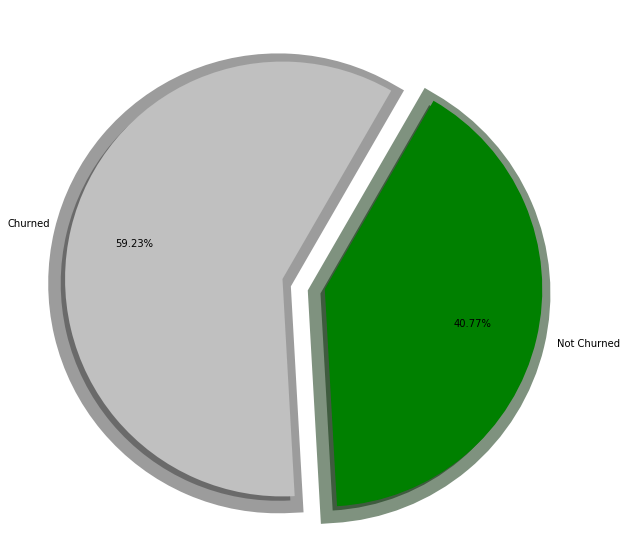

In [123]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

plt.pie(olist1.Class.value_counts(), autopct = '%1.2f%%', 
        explode = [0.0,0.2], 
        colors = ['silver', 'green'], 
        labels = ['Churned', 'Not Churned'],
       shadow = True, wedgeprops = {'linewidth': 25}  , pctdistance= 0.7, startangle = 60)
plt.show()

In [124]:
from sklearn.utils import shuffle
olist2 = shuffle(olist1)

In [125]:
olist1.head()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,seller_zip_code_prefix,product_name_lenght,...,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days,Delivery_befor_time,Class
0,14409,1.0,124.99,21.88,1.0,2.0,146.87,4,8577.0,41.0,...,0,0,0,0,0,0,0,4.0,3.0,1
1,68030,1.0,225.98,24.90,1.0,1.0,275.79,1,8577.0,41.0,...,0,0,0,0,0,0,0,2.0,5.0,1
2,68030,2.0,225.98,24.90,1.0,1.0,275.79,1,8577.0,41.0,...,0,0,0,0,0,0,0,2.0,5.0,1
3,92480,1.0,124.99,15.62,1.0,7.0,140.61,3,8577.0,41.0,...,0,0,0,0,0,0,0,1.0,4.0,1
4,25931,1.0,106.99,30.59,1.0,10.0,137.58,4,8577.0,41.0,...,0,0,0,0,0,0,0,1.0,10.0,1


We have shuffled the complete data, to avoide consistency.

In [126]:
olist2.head()

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,seller_zip_code_prefix,product_name_lenght,...,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days,Delivery_befor_time,Class
112350,89220,1.0,190.00,42.09,1.0,3.0,232.09,5,4782.0,57.0,...,1,0,0,0,0,0,0,1.0,4.0,0
112850,77813,1.0,36.90,34.15,1.0,1.0,71.05,4,89251.0,39.0,...,1,0,0,0,0,0,0,2.0,20.0,1
10910,29010,1.0,209.60,9.80,1.0,1.0,163.72,5,17510.0,53.0,...,0,0,0,0,0,0,1,2.0,4.0,1
100240,77695,1.0,144.99,29.41,1.0,10.0,174.40,4,3426.0,54.0,...,0,0,0,0,0,1,0,3.0,14.0,1
87289,82840,1.0,59.00,15.29,1.0,3.0,74.29,5,5849.0,54.0,...,0,0,0,0,0,1,0,2.0,3.0,0


In [127]:
olist2.shape, olist.shape

((114073, 51), (114073, 50))

One columns added in `olist2` is because target variable has been adjusted.

Let us drop unnecessery columns:

In [128]:
olist2.columns

Index(['customer_zip_code_prefix', 'order_item_id', 'price', 'freight_value',
       'payment_sequential', 'payment_installments', 'payment_value',
       'review_score', 'seller_zip_code_prefix', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
       'order_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'Delivered_item_in_days', 'Difference_between_estimated_Delivery_days',
       'Quickness_in_approval_in_days', 'Quickness_in_loading_in_days',
       'product_id', 'seller_id', 'shipping_limit_date', 'payment_type',
       'review_id', 'review_creation_date', 'review_answer_timestamp',
       'seller_city', 'seller_state', 'product_Computer_Office

In [129]:
olist3 = olist2.copy()

In [130]:
olist_data = olist3.drop([ 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'shipping_limit_date', 'review_creation_date',
                         'review_answer_timestamp'], axis = 1)

Let us see the complet data again:

In [131]:
olist_data.iloc[:5, 0:6]

,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments
112350,89220,1.0,190.00,42.09,1.0,3.0
112850,77813,1.0,36.90,34.15,1.0,1.0
10910,29010,1.0,209.60,9.80,1.0,1.0
100240,77695,1.0,144.99,29.41,1.0,10.0
87289,82840,1.0,59.00,15.29,1.0,3.0


In [132]:
olist_data.iloc[:5, 6:20]

,payment_value,review_score,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,customer_unique_id,customer_city,customer_state
112350,232.09,5,4782.0,57.0,1430.0,8.0,4700.0,35.0,25.0,25.0,afe505252a17ffb026986235a7615c71,f02292465189ed8f3845720662a35999,289,4178
112850,71.05,4,89251.0,39.0,750.0,1.0,275.0,18.0,4.0,18.0,d141f682decd1def777da4222e41666c,3224401e70fe4d65e21b57a95fab7c4c,39,330
10910,163.72,5,17510.0,53.0,212.0,6.0,900.0,28.0,10.0,28.0,6d4dd822defb49587337ca2fef0d24d3,b26fa76ddf33e534491e4ec46f51bc64,427,2299
100240,174.40,4,3426.0,54.0,629.0,1.0,1050.0,36.0,24.0,22.0,33c079892847267e01751ae4c018aeda,533f6a082e21c4886702bd9868385498,2,330
87289,74.29,5,5849.0,54.0,257.0,5.0,200.0,16.0,2.0,20.0,bad71f25ef760fa92b33c67339f3df60,ec1857e9f38a9fc1e288aeb48afda567,1775,5816


In [133]:
olist_data.iloc[:5, 20:30]

,order_id,order_status,Delivered_item_in_days,Difference_between_estimated_Delivery_days,Quickness_in_approval_in_days,Quickness_in_loading_in_days,product_id,seller_id,payment_type,review_id
112350,1ae76304686bb902dc30d60e5dbf9237,1,8.0,14.0,0.0,2.0,d19c5ff1a4d4e8b0558536d57cf43cf7,955fee9216a65b617aa5c0531780ce60,1,eb52226d91a8a287138c06597071e28b
112850,67e9ef421e7b550f69b5a5c2676a7a07,1,27.0,9.0,0.0,5.0,a29c670cb6c4fb685d04410dbbd6d5b2,ce248b21cb2adc36282ede306b7660e5,1,667661768c1b3322580fd455d7f26b48
10910,c29a7cc498263621590164d96d2953aa,1,8.0,17.0,0.0,2.0,b9ee7519d0187d2389af62ba6c612963,78c99c6dff4eeae5be99bf635ed21e3f,3,f41a84f6d4644acfdbab84374ae6bf60
100240,ba3f16abde04a2864215c98e536e2a46,1,20.0,14.0,0.0,3.0,ee406bf28024d97771c4b1e8b7e8e219,7a67c85e85bb2ce8582c35f2203ad736,1,8113dec548040e197da6f9998475ae66
87289,b0c79f808d274a5fb07f15350111d490,1,9.0,17.0,0.0,1.0,e06f99e79036d681effa3de75989bf22,6560211a19b47992c3666cc44a7e94c0,1,fcb5c2fd8082e24f1fdb7e5cef7103b0


In [134]:
olist_data.iloc[:5, 30:53]

,seller_city,seller_state,product_Computer_Office,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days,Delivery_befor_time,Class
112350,28427,81373,0,1,0,0,0,0,0,0,1.0,4.0,0
112850,218,4174,0,1,0,0,0,0,0,0,2.0,20.0,1
10910,231,81373,0,0,0,0,0,0,0,1,2.0,4.0,1
100240,28427,81373,0,0,0,0,0,0,1,0,3.0,14.0,1
87289,28427,81373,0,0,0,0,0,0,1,0,2.0,3.0,0


Finally the data is ready for further proceedings.

In [135]:
olist_data.shape

(114073, 43)

-----------------

In [136]:
len(olist_data.customer_id.unique()), len(olist_data.customer_unique_id.unique())

(95128, 92081)

In [137]:
olist_data1 = olist_data.copy()
olist_data1 = olist_data1.drop(['order_id', 'product_id', 'seller_id', 'review_id',
    'customer_zip_code_prefix', 'order_item_id', 'customer_id'], axis = 1)
olist_data1['customer_unique_id'] = olist_data1.groupby(['customer_unique_id'], sort=False).ngroup().add(1)
olist_data1.set_index('customer_unique_id', drop = True, inplace=True)

In [138]:
len(olist_data1.index.unique()), len(olist_data.customer_unique_id.unique())

(92081, 92081)

In [139]:
olist_data1.head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,seller_zip_code_prefix,product_name_lenght,product_description_lenght,product_photos_qty,...,product_Construction,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days,Delivery_befor_time,Class
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
1,190.00,42.09,1.0,3.0,232.09,5,4782.0,57.0,1430.0,8.0,...,1,0,0,0,0,0,0,1.0,4.0,0
2,36.90,34.15,1.0,1.0,71.05,4,89251.0,39.0,750.0,1.0,...,1,0,0,0,0,0,0,2.0,20.0,1
3,209.60,9.80,1.0,1.0,163.72,5,17510.0,53.0,212.0,6.0,...,0,0,0,0,0,0,1,2.0,4.0,1
4,144.99,29.41,1.0,10.0,174.40,4,3426.0,54.0,629.0,1.0,...,0,0,0,0,0,1,0,3.0,14.0,1
5,59.00,15.29,1.0,3.0,74.29,5,5849.0,54.0,257.0,5.0,...,0,0,0,0,0,1,0,2.0,3.0,0


In [140]:
from collections import Counter
counter_ind = Counter(olist_data1.index)

olist_data1['Order_frequency'] = olist_data1.index.map(counter_ind)

In [141]:
olist_data1.columns

Index(['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'review_score', 'seller_zip_code_prefix',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'customer_city',
       'customer_state', 'order_status', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days',
       'Quickness_in_approval_in_days', 'Quickness_in_loading_in_days',
       'payment_type', 'seller_city', 'seller_state',
       'product_Computer_Office', 'product_Construction',
       'product_Cosmetics_accessories', 'product_Electronics',
       'product_Furniture', 'product_Health_Medicinies', 'product_Households',
       'product_Sports_Fashion', 'Review_Answer_within_days',
       'Delivery_befor_time', 'Class', 'Order_frequency'],
      dtype='object')

In [142]:
olist_data1 = olist_data1.drop(['customer_city', 'seller_city', 'seller_state', 'seller_zip_code_prefix',
                               'customer_state'], axis = 1)

In [143]:
olist_data1['Product_volume'] = olist_data1.product_length_cm * olist_data1.product_height_cm * olist_data1.product_width_cm

In [144]:
a = olist_data1.copy()

In [145]:
a.shape

(114073, 32)

In [146]:
b = pd.pivot_table(index = olist_data1.index, values = 'Product_volume', aggfunc = sum, data = olist_data1 ).to_dict()
olist_data1['Product_volume'] = olist_data1.index.map(b['Product_volume'])
olist_data1.Product_volume

customer_unique_id
1        21875.0
2         1296.0
3        42215.0
4        19008.0
5          640.0
          ...   
92078    10240.0
13806    89910.0
92079     2646.0
92080     5550.0
92081     6138.0
Name: Product_volume, Length: 114073, dtype: float64

In [147]:
olist_data1 = olist_data1.drop([ 'product_length_cm', 'product_height_cm', 'product_width_cm'], axis = 1)

In [148]:
olist_data1.head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days,Delivery_befor_time,Class,Order_frequency,Product_volume
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
1,190.00,42.09,1.0,3.0,232.09,5,57.0,1430.0,8.0,4700.0,...,0,0,0,0,0,1.0,4.0,0,1,21875.0
2,36.90,34.15,1.0,1.0,71.05,4,39.0,750.0,1.0,275.0,...,0,0,0,0,0,2.0,20.0,1,1,1296.0
3,209.60,9.80,1.0,1.0,163.72,5,53.0,212.0,6.0,900.0,...,0,0,0,0,1,2.0,4.0,1,4,42215.0
4,144.99,29.41,1.0,10.0,174.40,4,54.0,629.0,1.0,1050.0,...,0,0,0,1,0,3.0,14.0,1,1,19008.0
5,59.00,15.29,1.0,3.0,74.29,5,54.0,257.0,5.0,200.0,...,0,0,0,1,0,2.0,3.0,0,1,640.0


In [189]:
olist_data1.Delivery_befor_time[olist_data1.Delivery_befor_time == olist_data1.Delivery_befor_time.min()]

customer_unique_id
22103   -1035.0
22103   -1035.0
Name: Delivery_befor_time, dtype: float64

In [150]:
# olist_data1 = olist_data1.drop([22103, 22103], axis = 0)

In [151]:
olist_data1.columns   

Index(['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'review_score', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'order_status', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days',
       'Quickness_in_approval_in_days', 'Quickness_in_loading_in_days',
       'payment_type', 'product_Computer_Office', 'product_Construction',
       'product_Cosmetics_accessories', 'product_Electronics',
       'product_Furniture', 'product_Health_Medicinies', 'product_Households',
       'product_Sports_Fashion', 'Review_Answer_within_days',
       'Delivery_befor_time', 'Class', 'Order_frequency', 'Product_volume'],
      dtype='object')

In [152]:
OLIST = olist_data1[['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'review_score', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g','Product_volume',
       'order_status', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days', 'Quickness_in_approval_in_days',
       'Quickness_in_loading_in_days', 'payment_type',
       'product_Computer_Office', 'product_Construction',
       'product_Cosmetics_accessories', 'product_Electronics',
       'product_Furniture', 'product_Health_Medicinies', 'product_Households',
       'product_Sports_Fashion', 'Review_Answer_within_days',
       'Delivery_befor_time', 'Order_frequency', 'Class']]
OLIST.head()

,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,...,product_Cosmetics_accessories,product_Electronics,product_Furniture,product_Health_Medicinies,product_Households,product_Sports_Fashion,Review_Answer_within_days,Delivery_befor_time,Order_frequency,Class
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
1,190.00,42.09,1.0,3.0,232.09,5,57.0,1430.0,8.0,4700.0,...,0,0,0,0,0,0,1.0,4.0,1,0
2,36.90,34.15,1.0,1.0,71.05,4,39.0,750.0,1.0,275.0,...,0,0,0,0,0,0,2.0,20.0,1,1
3,209.60,9.80,1.0,1.0,163.72,5,53.0,212.0,6.0,900.0,...,0,0,0,0,0,1,2.0,4.0,4,1
4,144.99,29.41,1.0,10.0,174.40,4,54.0,629.0,1.0,1050.0,...,0,0,0,0,1,0,3.0,14.0,1,1
5,59.00,15.29,1.0,3.0,74.29,5,54.0,257.0,5.0,200.0,...,0,0,0,0,1,0,2.0,3.0,1,0


---------------

In [153]:
OLIST.to_csv('OLIST.csv')

In [154]:
OLIST_final = OLIST[~OLIST.index.duplicated(keep='first')]

In [155]:
OLIST_final.shape, olist_data1.shape

((92081, 29), (114073, 29))

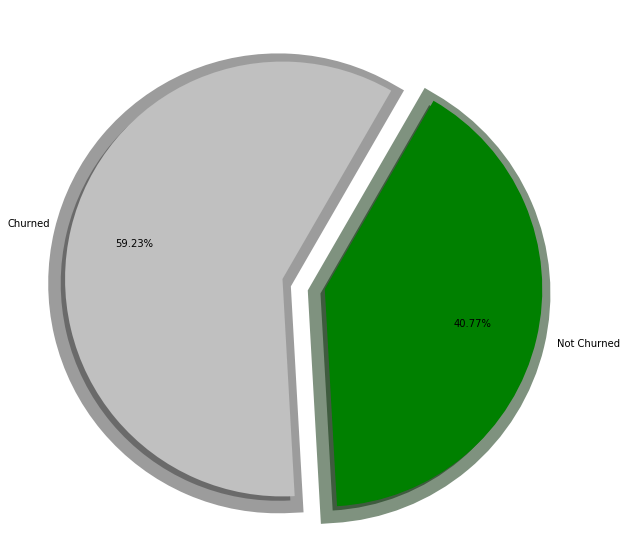

In [156]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,10))

plt.pie(OLIST.Class.value_counts(), autopct = '%1.2f%%', 
        explode = [0.0,0.2], 
        colors = ['silver', 'green'], 
        labels = ['Churned', 'Not Churned'],
       shadow = True, wedgeprops = {'linewidth': 25}  , pctdistance= 0.7, startangle = 60)
plt.show()

### Data is completely ready for further preceedings. 

## Treatment with outliers:

In [157]:
data = OLIST_final[['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'review_score', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'Product_volume', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days', 'Quickness_in_approval_in_days',
       'Quickness_in_loading_in_days', 'payment_type', 'Review_Answer_within_days',
       'Delivery_befor_time', 'Order_frequency']]

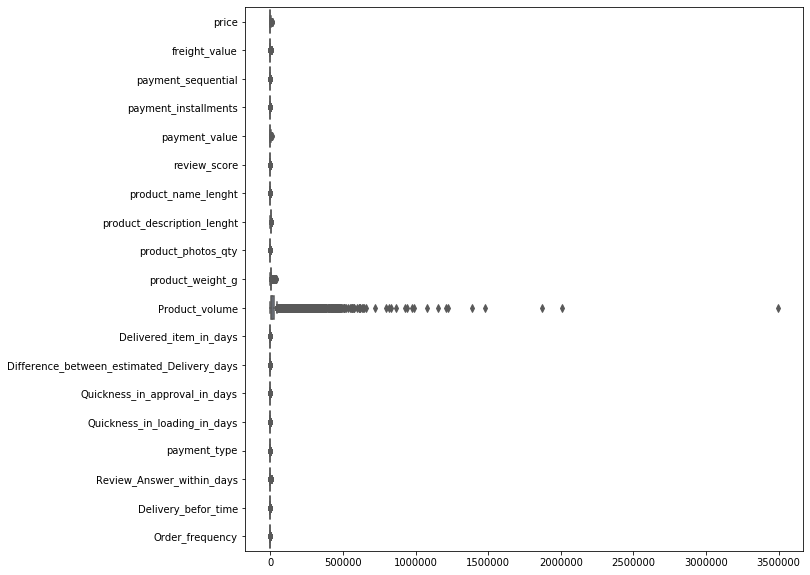

In [158]:
import seaborn as sns
plt.figure(figsize = (10,10))
ax = sns.boxplot(data=data, orient="h", palette="Set2")

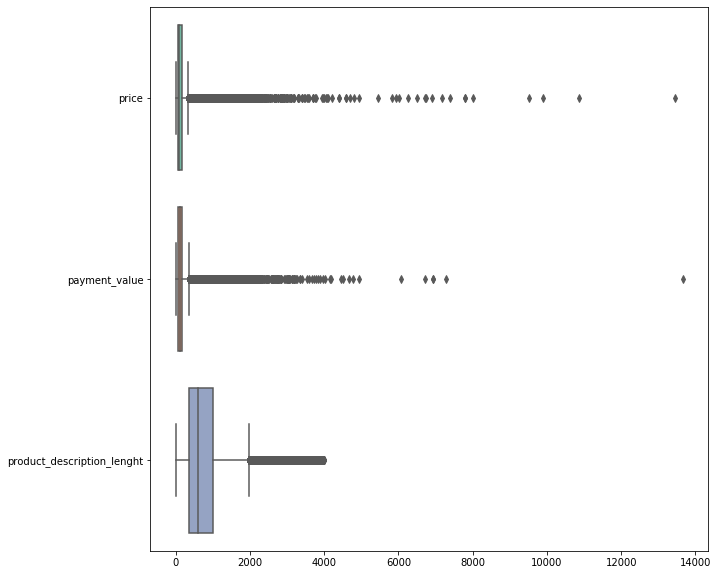

In [159]:
data1 = OLIST_final[['price', 'payment_value', 'product_description_lenght']]

import seaborn as sns
plt.figure(figsize = (10,10))
ax = sns.boxplot(data=data1, orient="h", palette="Set2")

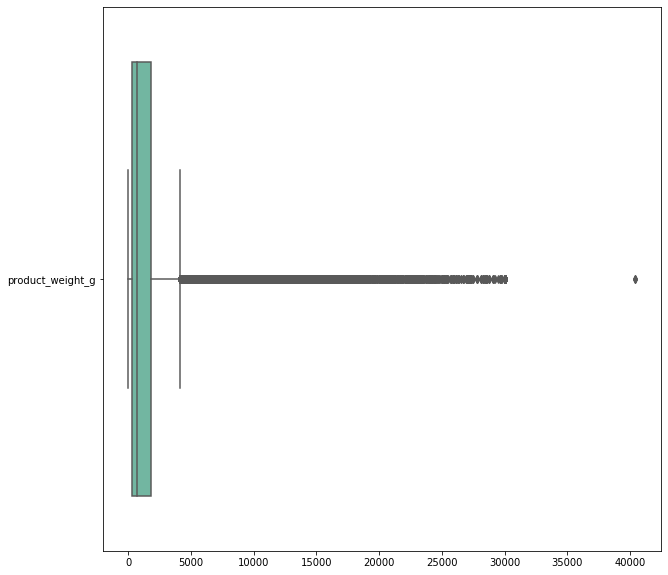

In [160]:
import seaborn as sns
plt.figure(figsize = (10,10))
ax = sns.boxplot(data=OLIST_final[['product_weight_g']], orient="h", palette="Set2")

In [161]:
data1 = OLIST_final[['freight_value', 'payment_sequential', 'payment_installments',
        'review_score', 'product_name_lenght', 'product_photos_qty', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days', 'Quickness_in_approval_in_days',
       'Quickness_in_loading_in_days', 'payment_type', 'Review_Answer_within_days',
       'Delivery_befor_time', 'Order_frequency']]

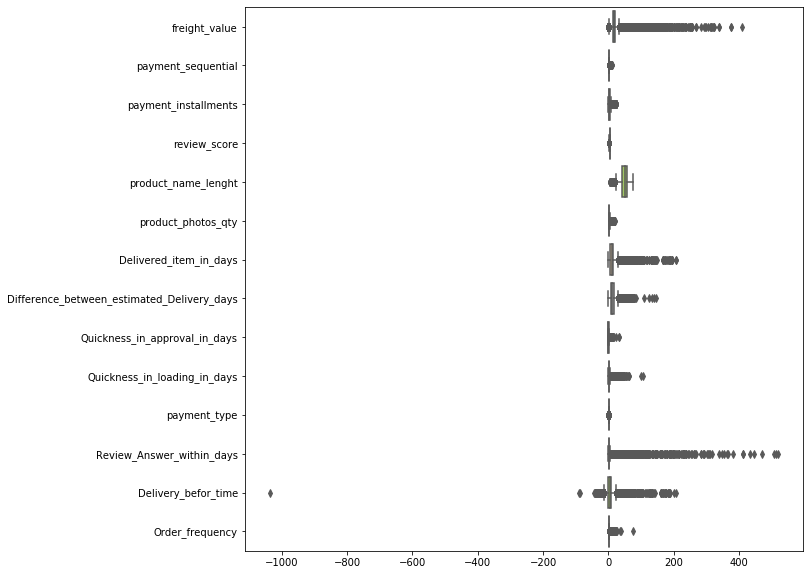

In [162]:
import seaborn as sns
plt.figure(figsize = (10,10))
ax = sns.boxplot(data=data1, orient="h", palette="Set2")

In [163]:
dataz = OLIST_final[['price', 'freight_value', 'payment_sequential', 'payment_installments',
       'payment_value', 'review_score', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'Product_volume', 'Delivered_item_in_days',
       'Difference_between_estimated_Delivery_days', 'Quickness_in_approval_in_days',
       'Quickness_in_loading_in_days', 'payment_type', 'Review_Answer_within_days',
       'Delivery_befor_time', 'Order_frequency']]

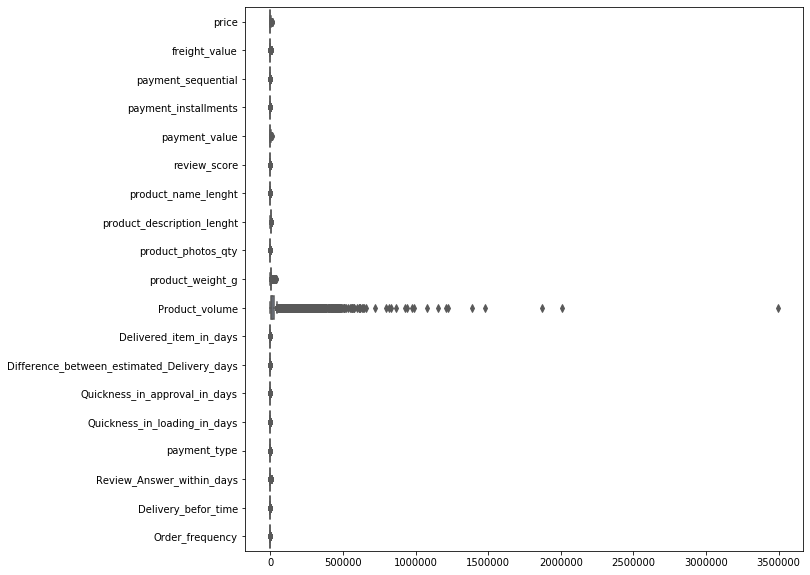

In [164]:
import seaborn as sns
plt.figure(figsize = (10,10))
ax = sns.boxplot(data=dataz, orient="h", palette="Set2")

------------

**Transformation in outlier values:**

In [165]:
OLIST_final['price'] = np.log(OLIST_final.price).values

OLIST_final['payment_value'] = np.log(OLIST_final.payment_value).values

OLIST_final['product_weight_g'] = np.log(OLIST_final.product_weight_g).values

OLIST_final['Product_volume'] = np.log(OLIST_final.Product_volume).values

OLIST_final['product_description_lenght'] = np.log(OLIST_final.product_description_lenght).values

---------------

Final Data Estimation:

In [166]:
OLIST_final.to_csv('olist_dataset.csv')

In [167]:
pd.read_csv('olist_dataset.csv').dtypes

customer_unique_id                              int64
price                                         float64
freight_value                                 float64
payment_sequential                            float64
payment_installments                          float64
payment_value                                 float64
review_score                                    int64
product_name_lenght                           float64
product_description_lenght                    float64
product_photos_qty                            float64
product_weight_g                              float64
Product_volume                                float64
order_status                                    int64
Delivered_item_in_days                        float64
Difference_between_estimated_Delivery_days    float64
Quickness_in_approval_in_days                 float64
Quickness_in_loading_in_days                  float64
payment_type                                    int64
product_Computer_Office     

In [168]:
OLIST_final.dtypes

price                                         float64
freight_value                                 float64
payment_sequential                            float64
payment_installments                          float64
payment_value                                 float64
review_score                                    int64
product_name_lenght                           float64
product_description_lenght                    float64
product_photos_qty                            float64
product_weight_g                              float64
Product_volume                                float64
order_status                                    int64
Delivered_item_in_days                        float64
Difference_between_estimated_Delivery_days    float64
Quickness_in_approval_in_days                 float64
Quickness_in_loading_in_days                  float64
payment_type                                    int32
product_Computer_Office                         uint8
product_Construction        

In [169]:
OLIST_final.isna().sum()

price                                         0
freight_value                                 0
payment_sequential                            0
payment_installments                          0
payment_value                                 0
review_score                                  0
product_name_lenght                           0
product_description_lenght                    0
product_photos_qty                            0
product_weight_g                              0
Product_volume                                0
order_status                                  0
Delivered_item_in_days                        0
Difference_between_estimated_Delivery_days    0
Quickness_in_approval_in_days                 0
Quickness_in_loading_in_days                  0
payment_type                                  0
product_Computer_Office                       0
product_Construction                          0
product_Cosmetics_accessories                 0
product_Electronics                     

--------------------

In [170]:
#for i in OLIST_final.columns:
#    iqr=OLIST_final[i].quantile(0.75)-OLIST_final[i].quantile(0.25)
#    ul=OLIST_final[i].quantile(0.75)+1.5*iqr
#    ll=OLIST_final[i].quantile(0.25)-1.5*iqr
#    OLIST_final.loc[OLIST_final[i]>ul]=ul
#    OLIST_final.loc[OLIST_final[i]<ll]=ll

********************************

--------

# Statistical Tests:

---------------

### Needed

**Relationship between Approval time to the loading order time:**

`* Ho: Means are samilar. There is no significant change difference between approval time to the loading time.`

`* H1: Means are dissamilar. There is a significant change difference between approval time to the loading time.`

In [171]:
import scipy.stats as st

stat_value, pvalue = st.f_oneway(OLIST_final.Quickness_in_approval_in_days, OLIST_final.Quickness_in_loading_in_days)
print('P_value =',pvalue)

if pvalue > 0.05:
    print('\nWe are failed to reject null hypothesis. Which means there is no significant change difference between approval time to the loading time.')
    
else:
    print('\nWe reject our null hypothesis. Which means there is a significant change difference between approval time to the loading time. ')

P_value = 0.0

We reject our null hypothesis. Which means there is a significant change difference between approval time to the loading time. 


**Relationship between price of the product to the peoduct itself, which we have initially made purposely categorical:**

`* Ho: Means are samilar. There is indeed no specific relation in Product and Price.`

`* H1: Means are dissamilar. There is indeed a specific relation in Product and Price.`

In [172]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

pr = pd.read_csv('categorical_data.csv')
pr['price'] = OLIST_final['price']

model = ols('price~product', data = pr).fit()
print(sm.stats.anova_lm(model))

               df        sum_sq    mean_sq          F        PR(>F)
product       7.0    131.332280  18.761754  20.758767  4.128846e-28
Residual  92076.0  83218.203154   0.903799        NaN           NaN


In [173]:
pvalue = 1.971098e-31  ; alpha = 0.05
if pvalue > alpha:
    print('\nWe failed to reject our null hypothesis.')
    print('Hence we claim that There is indeed no specific relation in Product and Price.')
else:
    print('\nWe reject our null hypothesis.')
    print('Hence we claim that There is indeed a specific relation in Product and Price.')


We reject our null hypothesis.
Hence we claim that There is indeed a specific relation in Product and Price.


#### Here we proved two things:
* Casually products are based on their prices and moreover the expense is dependent upon the product quality and its existence.
* What we made the separate categories of all products, are fine to go with just because there may be some products have lesser price.

**Relationship between the customer with the order frequencies:**

`* Ho: Means are samilar. There is indeed no specific relation in Customer consistency and Orders frequency.`

`* H1: Means are dissamilar. There is indeed a specific relation in Customer consistency and Orders frequency.`

In [174]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model1 = ols('Order_frequency~Class', data = OLIST).fit()
print(sm.stats.anova_lm(model1))

                df         sum_sq      mean_sq           F        PR(>F)
Class          1.0    1634.657777  1634.657777  201.153673  1.279167e-45
Residual  114071.0  926988.030344     8.126413         NaN           NaN


In [175]:
pvalue = 1.285571e-45 ; alpha = 0.05
if pvalue > alpha:
    print('\nWe failed to reject our null hypothesis.')
    print('Hence we claim that There is indeed no specific relation in Customer consistency and Orders frequency.')
else:
    print('\nWe reject our null hypothesis.')
    print('Hence we claim that There is indeed a specific relation in Customer consistency and Orders frequency.')


We reject our null hypothesis.
Hence we claim that There is indeed a specific relation in Customer consistency and Orders frequency.


For some customers indeed we did not get any relationship in their consistency. High customers are also churned. But most of the customers were remain for their frequency in orders and which is what we proved here in `statistical test`.

### Needed

**Relatioship between order status and quickness in deliveries:**

`* Ho: Means are samilar. There is indeed no specific relation in Order delivery consistency and status of the order.`

`* H1: Means are dissamilar. There is indeed a specific relation in Order delivery consistency and status of the order.`

In [176]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model2 = ols('Difference_between_estimated_Delivery_days~order_status', data = OLIST).fit()
print(sm.stats.anova_lm(model2))

                    df        sum_sq      mean_sq          F        PR(>F)
order_status       1.0  2.854248e+03  2854.247927  53.071479  3.236943e-13
Residual      114071.0  6.134876e+06    53.781202        NaN           NaN


In [177]:
pvalue = 3.236943e-13 ; alpha = 0.05
if pvalue > alpha:
    print('\nWe failed to reject our null hypothesis.')
    print('Hence we claim that There is indeed no specific relation in Order delivery consistency and status of the order.')
else:
    print('\nWe reject our null hypothesis.')
    print('Hence we claim that There is indeed a specific relation in Order delivery consistency and status of the order.')


We reject our null hypothesis.
Hence we claim that There is indeed a specific relation in Order delivery consistency and status of the order.


Which means we see that, order delivery time affects the delivery status by the cusomers. This may happen that the delay in order can cause the customer does not accept the product which can lead to churn the customer.

### Needed

**Relationship between order status and customer consistency:**

`* Ho: Means are samilar. There is no significant relation between order status and customer consistency.`

`* H1: Means are dissamilar. There is a significant relation between order status and customer consistency.`

In [178]:
dataframe = pd.crosstab(OLIST.Class, OLIST.order_status)

import scipy.stats as st

tvalue, pvalue, df, exp_val = st.chi2_contingency(dataframe)

print()
print('P_value =',pvalue) ; alpha = 0.05

if pvalue>alpha:
    print('\nWe are failed to reject our null hypothesis.')
    print('There is no significant relation between order status and customer consistency.')
else:
    print('\nWe reject our null hypothesis.')
    print('There is a significant relation between order status and customer consistency.')   


P_value = 0.070188265074704

We are failed to reject our null hypothesis.
There is no significant relation between order status and customer consistency.


Hence the thing is the churning of the customer is independent of the status of the order.

### Needed

**Relationship between order household products and cosmetic sales:**

`* Ho: Means are samilar. There is no significant relation between household products and cosmetic sales.`

`* H1: Means are dissamilar. There is a significant relation between household products and cosmetic sales.`

In [179]:
dataframe1 = pd.crosstab(OLIST_final.product_Cosmetics_accessories, OLIST_final.product_Households)

import scipy.stats as st

tvalue, pvalue, df, exp_val = st.chi2_contingency(dataframe1)

print()
print('P_value =',pvalue) ; alpha = 0.05

if pvalue>alpha:
    print('\nWe are failed to reject our null hypothesis.')
    print('Not neccesserily customers purchase these two products.')
else:
    print('\nWe reject our null hypothesis.')
    print('Customers purchasing households can attract towards the cosmetics accessories as well.')   


P_value = 0.0

We reject our null hypothesis.
Customers purchasing households can attract towards the cosmetics accessories as well.


**Sample analysis of the price and frequency in orders:**

`* Ho: Means are samilar. There is no significant relation between expense and frequency in orders.`

`* H1: Means are dissamilar. There is a significant relation between expense and frequency in orders.`

In [180]:
one_sample = OLIST_final[OLIST_final.price< OLIST_final.price.mean()]['Order_frequency'].sample(10000)
second_sample = OLIST_final[OLIST_final.price> OLIST_final.price.mean()]['Order_frequency'].sample(10000)

stat_value, pvalue = st.ttest_rel(one_sample, second_sample)

print('P_value =',pvalue); alpha = 0.05

if pvalue > alpha:
    print('\nWe are failed to reject our null hypothesis.')
    print('Higher the price does not affect the frequency of orders.')
else:
    print('\nWe fail our null hypothesis.')
    print('Higher the price affects the frequency of orders.')

P_value = 2.1777358402133215e-105

We fail our null hypothesis.
Higher the price affects the frequency of orders.


**Relationship between order household products and cosmetic sales:**

`* Ho: Means are samilar. There is no significant relation between product description and customer reviews.`

`* H1: Means are dissamilar. There is a significant relation between product description and customer reviews.`

In [181]:
import scipy.stats as st

stat_value, pvalue = st.f_oneway(OLIST_final.product_description_lenght, OLIST_final.review_score)
print('P_value =',pvalue)

if pvalue > 0.05:
    print('\nWe are failed to reject null hypothesis. Which means there is no effect of description on reviews.')
    
else:
    print('\nWe reject our null hypothesis. Which means there is an effect of description on reviews. ')

P_value = 0.0

We reject our null hypothesis. Which means there is an effect of description on reviews. 


**Relationship between product size and price of the products:**

`* Ho: Means are samilar. There is no significant relation between size of the products and their prices.`

`* H1: Means are dissamilar. There is a significant relation between size of the products and their prices.`

In [182]:
# dataframe2 = pd.DataFrame()
# dataframe2['Price'] = OLIST_final.price
# dataframe2['Product_size'] = OLIST_final.product_length_cm*OLIST_final.product_height_cm*OLIST_final.product_width_cm

import scipy.stats as st

stat_value, pvalue = st.f_oneway(OLIST_final.price, OLIST_final.Product_volume)
print('P_value =',pvalue)

if pvalue > 0.05:
    print('\nWe are failed to reject null hypothesis. Which means there is no effect of size on price.')
    
else:
    print('\nWe reject our null hypothesis. Which means there is an effect of size on price.')

P_value = 0.0

We reject our null hypothesis. Which means there is an effect of size on price.


**Relationship between order product freight value and price of the products:**

`* Ho: Means are samilar. There is no significant relation between freight value and price of respective product.`

`* H1: Means are dissamilar. There is a significant relation between freight value and price of respective product.`

In [183]:
dataframe3 = pd.DataFrame()
dataframe3['Price'] = OLIST_final.price
dataframe3['Freight_value'] = OLIST_final.freight_value

import scipy.stats as st

stat_value, pvalue = st.f_oneway(dataframe3.Price, dataframe3.Freight_value)
print('P_value =',pvalue)

if pvalue > 0.05:
    print('\nWe are failed to reject null hypothesis. Which means there is no effect of freight value on price.')
    
else:
    print('\nWe reject our null hypothesis. Which means there is an effect of freight value on price.')

P_value = 0.0

We reject our null hypothesis. Which means there is an effect of freight value on price.


**Relationship between product size and freight value:**

`* Ho: Means are samilar. There is no significant relation between size of the products and freight value.`

`* H1: Means are dissamilar. There is a significant relation between size of the products and freight value.`

In [184]:
# dataframe4 = pd.DataFrame()
# dataframe4['Freight_value'] = OLIST_final.freight_value
# dataframe4['Product_size'] = OLIST_final.product_length_cm+OLIST_final.product_height_cm+OLIST_final.product_width_cm

import scipy.stats as st

stat_value, pvalue = st.f_oneway(OLIST_final.freight_value, OLIST_final.Product_volume)
print('P_value =',pvalue)

if pvalue > 0.05:
    print('\nWe are failed to reject null hypothesis. Which means there is no effect of size of the product on Freight value.')
    
else:
    print('\nWe reject our null hypothesis. Which means there is an effect of size of the product on freight value.')

P_value = 0.0

We reject our null hypothesis. Which means there is an effect of size of the product on freight value.


------------

In [185]:
statistical_analysis = pd.DataFrame({'Feature1':['Quickness_in_approval_in_days','price', 'Order_frequency', 
                          'Difference_between_estimated_Delivery_days', 'order_status', 'product_Cosmetics_accessories',
                         'price','product_description_lenght', 'price', 'price', 'Freight_value'], 
              
             'Feature2':['Quickness_in_loading_in_days', 'product', 'Class', 'order_status', 'Class',
                        'product_Households', 'Order_frequency', 'review_score', 'Product_volume','Freight_value',
                        'Product_volume'],
              
             'Significance':['Significant relation', 'Significant relation', 'Significant relation',
                            'Significant relation', 'Insignificant relation','Significant relation',
                            'Significant relation', 'Significant relation', 'Significant relation',
                            'Significant relation', 'Significant relation']}, index = [i for i in range(1,12)])

In [186]:
statistical_analysis

,Feature1,Feature2,Significance
1,Quickness_in_approval_in_days,Quickness_in_loading_in_days,Significant relation
2,price,product,Significant relation
3,Order_frequency,Class,Significant relation
4,Difference_between_estimated_Delivery_days,order_status,Significant relation
5,order_status,Class,Insignificant relation
6,product_Cosmetics_accessories,product_Households,Significant relation
7,price,Order_frequency,Significant relation
8,product_description_lenght,review_score,Significant relation
9,price,Product_volume,Significant relation
10,price,Freight_value,Significant relation


### Insights from `Statistical Tests`:

* There is a significant change difference between approval time to the loading time. 
* There is indeed specific relation in Product and Price. Price is dependent on the product for some cases.
* There is indeed a specific relation in Customer consistency and Orders frequency. The customers are ordering consistently they are either leaving the service or strongly stayed to the service.
* There is indeed a specific relation in Order delivery consistency and status of the order. For sure if the delivery gets earlier customers become happy with the services. They remain consistent with the service.
* There is no significant relation between order status and customer consistency. Which means if the order does not approved by the customer, this does not lead to leave the service. But `this scenario does not make sense for each circumstances.`
* Customers purchasing households can attract towards the cosmetics accessories as well. Which means buyers are ladies for households stuffs. We can give them like cosmetic discount to increase the customers count. `We have done so much Visualizations to prove this.`
* Higher the price of products affect the frequency of orders. 
    * People from the area are not keen in shopping. Company should bestow them greatest offers.
    * May be if possible give a discount to the customers who have a higher frequency in the order. 
* There is an effect of description on reviews. Company should give the good description of the product to the customers. Elaborate the product very well.
* Price of the product is definitely depend upon the size for some cases like households or clothes and fashions. For some cases this is not related especially for the `Electronic Devices`. Hence we can claim that, most of the things in the sevice are available on households products. `We also proved this in Visualizations.`
* There is an affect of size and price on freight value. Some products are of lesser size with high expense can effect the freight value and vise versa.

-------------